In [1]:
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
import pycrs
import matplotlib.pyplot as plt

In [39]:
!curl dl.maptools.org/dl/geotiff/samples/gdal_eg/cea.tif

/bin/sh: 1: wget: not found


In [2]:
def getFeatures(gdf):
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

For this example to work, you need to copy a valid tif in ./data/original.tif.

In [3]:
with rasterio.open("../data/original.tif") as data:
    crss = data.crs
    bounds = data.bounds    

In [4]:
bounds

BoundingBox(left=-28493.166784412522, bottom=4224973.143255847, right=2358.211624949061, top=4255884.5438021915)

In [21]:
bbox = box(-20447, 4234952, -7936, 4228843)
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=crss)    

In [22]:
width_in_projected_units = bounds.right - bounds.left
width_in_projected_units

30851.378409361583

In [23]:
height_in_projected_units = bounds.top - bounds.bottom
height_in_projected_units

30911.40054634493

In [24]:
crss

CRS.from_wkt('PROJCS["unnamed",GEOGCS["NAD27",DATUM["North_American_Datum_1927",SPHEROID["Clarke 1866",6378206.4,294.9786982138982,AUTHORITY["EPSG","7008"]],AUTHORITY["EPSG","6267"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4267"]],PROJECTION["Cylindrical_Equal_Area"],PARAMETER["standard_parallel_1",33.75],PARAMETER["central_meridian",-117.333333333333],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]')

In [25]:
int(bounds.right)

2358

In [26]:
bounds

BoundingBox(left=-28493.166784412522, bottom=4224973.143255847, right=2358.211624949061, top=4255884.5438021915)

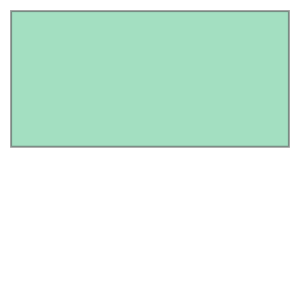

In [27]:
bbox

In [28]:
geo

,geometry
0,"POLYGON ((-7936 4234952, -7936 4228843, -20447..."


{'proj': 'cea', 'lon_0': -117.333333333333, 'lat_ts': 33.75, 'x_0': 0, 'y_0': 0, 'datum': 'NAD27', 'units': 'm', 'no_defs': True}


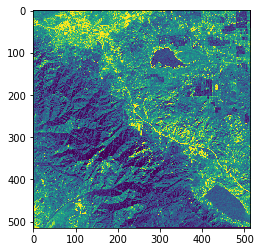

In [29]:
with rasterio.open("../data/original.tif") as data:
    geo = geo.to_crs(crs=data.crs.data)
    coords = getFeatures(geo)
    
    fig = plt.imshow(data.read(1))

    out_img, out_transform = mask(dataset=data, shapes=coords, crop=True)

    out_meta = data.meta.copy()
    print(data.crs.data)
    #epsg_code = int(data.crs.data['init'][5:])
    #epsg_code

    out_meta.update({
        "driver": "GTiff",
        "height": out_img.shape[1],
        "wight": out_img.shape[2],
        "transform": out_transform,
#        "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()
    })

In [30]:
coords

[{'type': 'Polygon',
  'coordinates': [[[-7936.0, 4234952.0],
    [-7936.0, 4228843.0],
    [-20447.0, 4228843.0],
    [-20447.0, 4234952.0],
    [-7936.0, 4234952.0]]]}]

In [31]:
out_meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 514,
 'height': 103,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["NAD27",DATUM["North_American_Datum_1927",SPHEROID["Clarke 1866",6378206.4,294.9786982138982,AUTHORITY["EPSG","7008"]],AUTHORITY["EPSG","6267"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4267"]],PROJECTION["Cylindrical_Equal_Area"],PARAMETER["standard_parallel_1",33.75],PARAMETER["central_meridian",-117.333333333333],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'),
 'transform': Affine(60.02213698319374, 0.0, -20450.20042866456,
        0.0, -60.02213698319374, 4234996.84013204),
 'wight': 209}

In [32]:
out_transform

Affine(60.02213698319374, 0.0, -20450.20042866456,
       0.0, -60.02213698319374, 4234996.84013204)

In [33]:
with rasterio.open("../data/clipped.tif", "w", **out_meta) as dest:
    dest.write(out_img)

In [34]:
from matplotlib import pyplot as plt

In [35]:
out_img[0]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,  74,  41,   0],
       [  8,   0, 123, ...,  66,  90,   0],
       ...,
       [ 74,  16,  49, ...,  58,  74,   0],
       [  8,  74, 115, ...,  33,  66,   0],
       [ 49,  66,  90, ...,  33,  33,   0]], dtype=uint8)

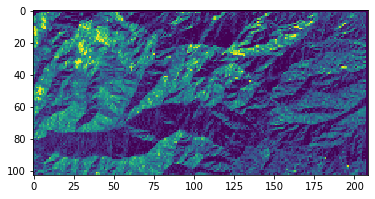

In [36]:
fig = plt.imshow(out_img[0])